In [156]:
#importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

In [157]:
# Load the dataset
df = pd.read_csv("D:\\Users\\shind\\Downloads\\bank.csv")

In [158]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [159]:
#Handling categorical features
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education'])


In [160]:
#splitting data into features (X) and target (y)
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']


In [161]:
#using train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
print(X_train.dtypes)


age                     int64
default                object
balance                 int64
housing                object
loan                   object
contact                object
day                     int64
month                  object
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome               object
job_admin.               bool
job_blue-collar          bool
job_entrepreneur         bool
job_housemaid            bool
job_management           bool
job_retired              bool
job_self-employed        bool
job_services             bool
job_student              bool
job_technician           bool
job_unemployed           bool
job_unknown              bool
marital_divorced         bool
marital_married          bool
marital_single           bool
education_primary        bool
education_secondary      bool
education_tertiary       bool
education_unknown        bool
dtype: object


In [163]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['default', 'housing', 'loan', 'contact', 'month', 'poutcome'], dtype='object')


In [164]:
#converting all columns datatypes to numeric which have datatype as object for training
X_train['default'] = X_train['default'].map({'no': 0, 'yes': 1})
X_train['housing'] = X_train['housing'].map({'no': 0, 'yes': 1})
X_train['loan'] = X_train['loan'].map({'no': 0, 'yes': 1})
X_train['month'] = X_train['month'].map({'no': 0, 'yes': 1})
X_train['contact'] = X_train['contact'].map({'no': 0, 'yes': 1})
X_train['poutcome'] = X_train['poutcome'].map({'no': 0, 'yes': 1})


In [165]:
#same for data containing 'yes' value
X_test['default'] = X_test['default'].map({'no': 0, 'yes': 1})
X_test['housing'] = X_test['housing'].map({'no': 0, 'yes': 1})
X_test['loan'] = X_test['loan'].map({'no': 0, 'yes': 1})
X_test['month'] = X_test['month'].map({'no': 0, 'yes': 1})
X_test['contact'] = X_test['contact'].map({'no': 0, 'yes': 1})
X_test['poutcome'] = X_test['poutcome'].map({'no': 0, 'yes': 1})

In [166]:
#training the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [167]:
#predictions and evaluations
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{report}")


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.29      0.39        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.67       905
weighted avg       0.88      0.90      0.89       905



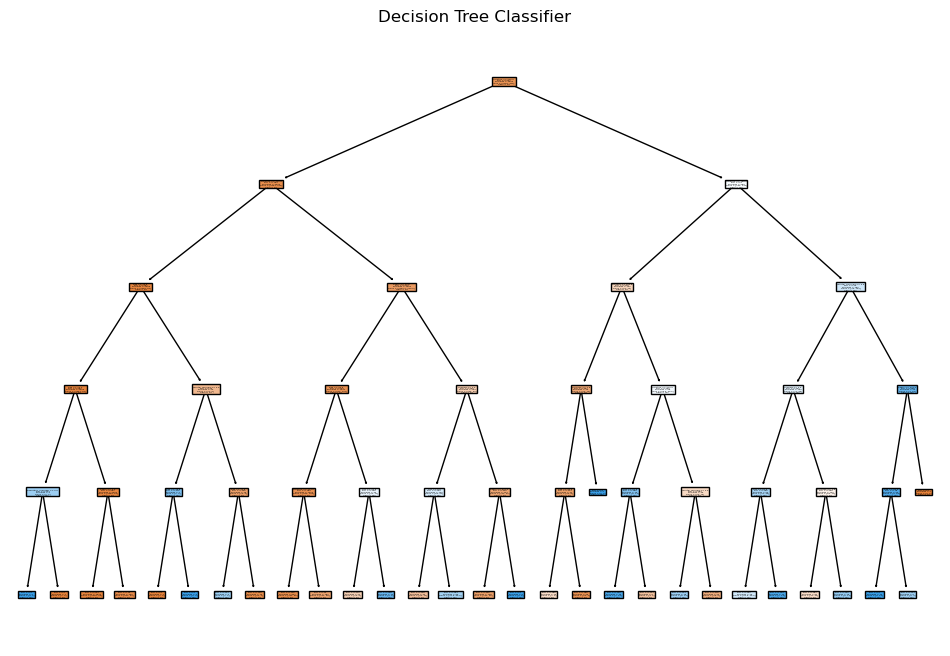

In [168]:
#visualisation using matplotlib
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()
